<h1><b>Project Name: Data mining for automated personality classification


In [2]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dts=pd.read_csv('/content/test dataset.csv')

In [ ]:
dtt=pd.read_csv('/content/train dataset.csv')

In [ ]:
dts

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
...,...,...,...,...,...,...,...,...
310,Female,19,6,5,6,4,3,extraverted
311,Male,18,2,5,8,3,7,dependable
312,Male,18,7,5,6,2,7,serious
313,Male,23,6,7,5,4,3,extraverted


In [ ]:
dtt

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
704,Female,20,4,5,6,6,1,responsible
705,Male,18,6,3,1,5,5,dependable
706,Male,22,5,2,3,6,1,serious
707,Male,19,5,6,5,7,5,extraverted


In [ ]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     315 non-null    object
 1   Age                        315 non-null    int64 
 2   openness                   315 non-null    int64 
 3   neuroticism                315 non-null    int64 
 4   conscientiousness          315 non-null    int64 
 5   agreeableness              315 non-null    int64 
 6   extraversion               315 non-null    int64 
 7   Personality (class label)  315 non-null    object
dtypes: int64(6), object(2)
memory usage: 19.8+ KB


In [ ]:
dts.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [ ]:
dts.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64

<h1><b>Data visulisation

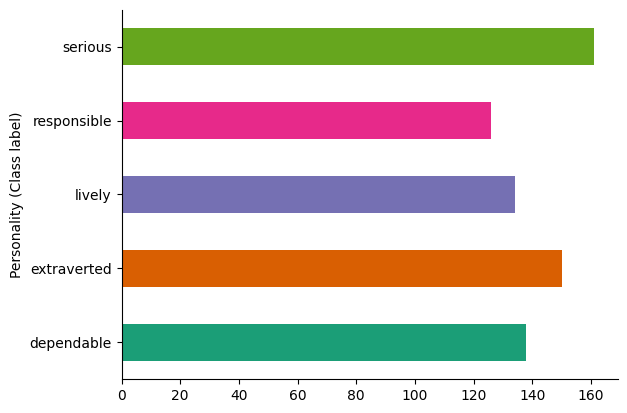

In [ ]:
# @title Personality (Class label)

from matplotlib import pyplot as plt
import seaborn as sns
dtt.groupby('Personality (Class label)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Age', ylabel='Count'>

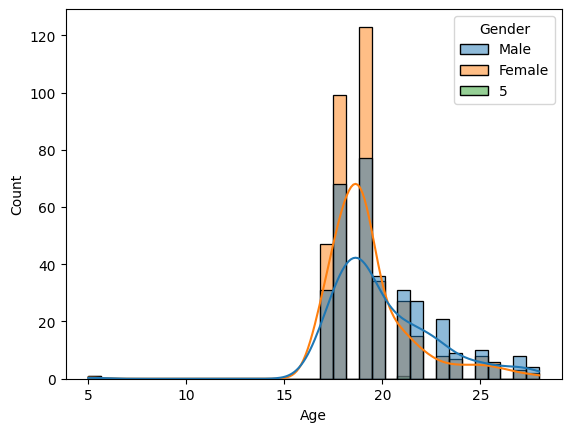

In [ ]:
# @title Distribution of Age by Gender

sns.histplot(data=dtt, x='Age', hue='Gender', kde=True)

<Axes: xlabel='Age', ylabel='neuroticism'>

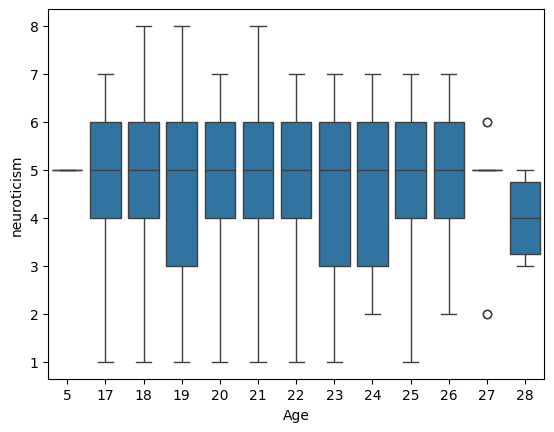

In [ ]:
# @title Age vs Neuroticism

sns.boxplot(data=dtt, x="Age", y="neuroticism")

<ipython-input-10-45ca0ab35cbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dtt, x='openness', y='Personality (Class label)', inner='box', palette='Dark2')


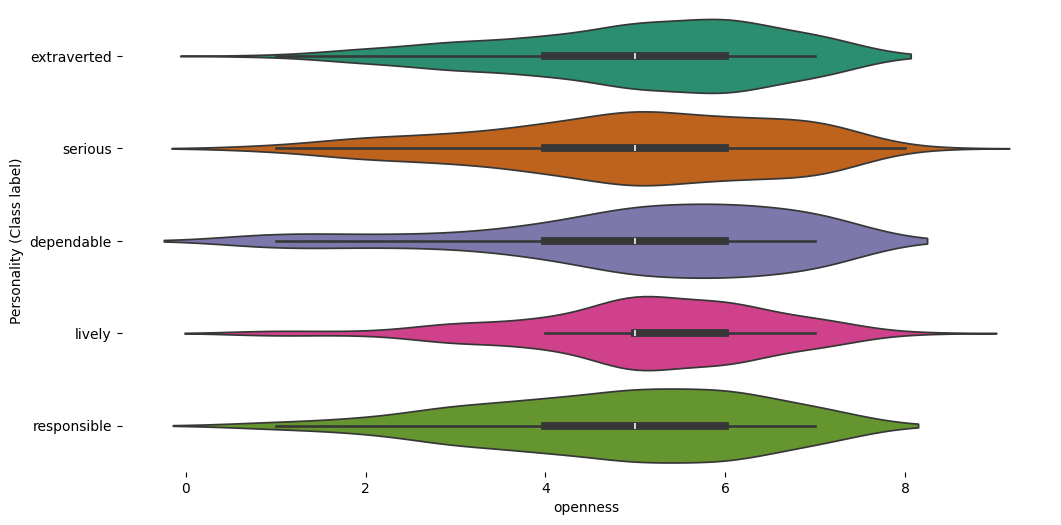

In [ ]:
# @title Personality (Class label) vs openness

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dtt['Personality (Class label)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dtt, x='openness', y='Personality (Class label)', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: >

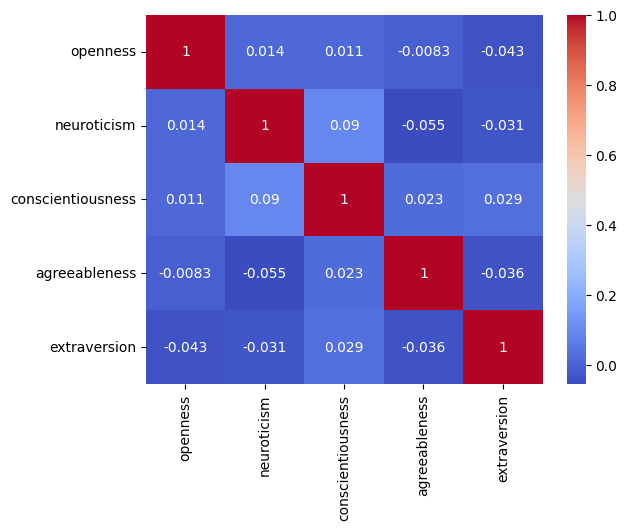

In [ ]:
# @title Correlation matrix of Big Five personality traits

corr = dtt[['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='openness', ylabel='neuroticism'>

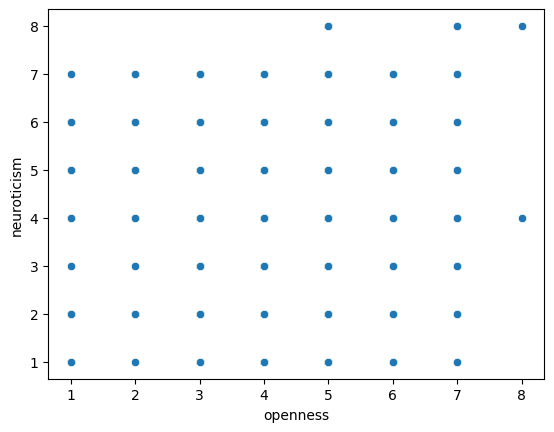

In [ ]:
# @title Openness vs Neuroticism

sns.scatterplot(data=dtt, x='openness', y='neuroticism')

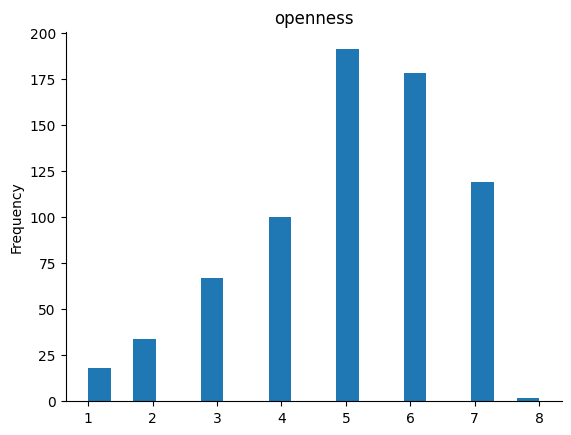

In [ ]:
# @title openness

from matplotlib import pyplot as plt
dtt['openness'].plot(kind='hist', bins=20, title='openness')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Age', ylabel='count'>

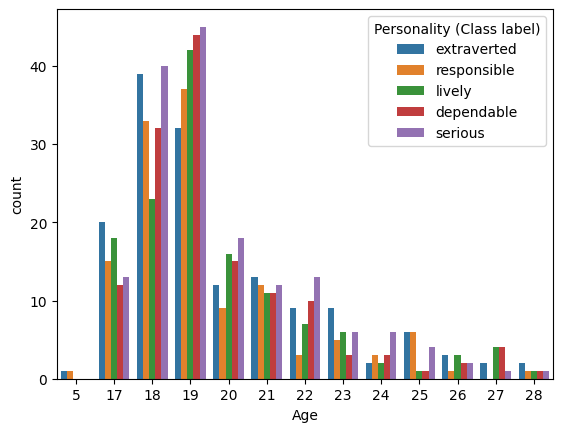

In [ ]:
# @title Age vs Personality Class

sns.countplot(data=dtt, x='Age', hue='Personality (Class label)')

<h1><b>models

In [3]:
dts = pd.read_csv('/content/Train_split.csv', encoding='latin1')


In [4]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = dts.drop('Personality', axis=1)
y = dts['Personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9085


In [6]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

        ENFJ       0.93      0.91      0.92       739
        ENFP       0.93      0.94      0.93       773
        ENTJ       0.93      0.96      0.95       738
        ENTP       0.94      0.95      0.94       748
        ESFJ       0.86      0.83      0.84       770
        ESFP       0.93      0.94      0.94       790
        ESTJ       0.93      0.93      0.93       739
        ESTP       0.93      0.92      0.93       773
        INFJ       0.91      0.91      0.91       775
        INFP       0.89      0.88      0.88       749
        INTJ       0.88      0.89      0.89       699
        INTP       0.90      0.90      0.90       744
        ISFJ       0.88      0.89      0.88       753
        ISFP       0.91      0.89      0.90       745
        ISTJ       0.88      0.90      0.89       740
        ISTP       0.87      0.89      0.88       725

    accuracy                           0.91     12000
   macro avg       0.91   

<h1><b>DS model

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
tree_y_pred = tree_model.predict(X_test)

# Calculate the accuracy of the decision tree model
tree_accuracy = accuracy_score(y_test, tree_y_pred)
print(f'Decision Tree Model Accuracy: {tree_accuracy}')

# Optionally, you can also generate a classification report for the decision tree model
tree_report = classification_report(y_test, tree_y_pred)
print(tree_report)


Decision Tree Model Accuracy: 0.6445833333333333
              precision    recall  f1-score   support

        ENFJ       0.65      0.67      0.66       739
        ENFP       0.62      0.64      0.63       773
        ENTJ       0.68      0.69      0.69       738
        ENTP       0.64      0.64      0.64       748
        ESFJ       0.63      0.65      0.64       770
        ESFP       0.69      0.64      0.66       790
        ESTJ       0.63      0.61      0.62       739
        ESTP       0.71      0.67      0.69       773
        INFJ       0.64      0.62      0.63       775
        INFP       0.63      0.64      0.64       749
        INTJ       0.63      0.65      0.64       699
        INTP       0.64      0.64      0.64       744
        ISFJ       0.62      0.64      0.63       753
        ISFP       0.63      0.63      0.63       745
        ISTJ       0.64      0.64      0.64       740
        ISTP       0.63      0.64      0.63       725

    accuracy                   

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Model Accuracy: {rf_accuracy}')

# Optionally, you can also generate a classification report for the Random Forest model
rf_report = classification_report(y_test, rf_y_pred)
print(rf_report)


Random Forest Model Accuracy: 0.9743333333333334
              precision    recall  f1-score   support

        ENFJ       0.97      0.98      0.98       739
        ENFP       0.98      0.98      0.98       773
        ENTJ       0.97      0.98      0.98       738
        ENTP       0.98      0.98      0.98       748
        ESFJ       0.98      0.97      0.98       770
        ESFP       0.98      0.98      0.98       790
        ESTJ       0.97      0.98      0.97       739
        ESTP       0.98      0.98      0.98       773
        INFJ       0.97      0.96      0.96       775
        INFP       0.97      0.97      0.97       749
        INTJ       0.97      0.98      0.97       699
        INTP       0.96      0.98      0.97       744
        ISFJ       0.98      0.96      0.97       753
        ISFP       0.98      0.97      0.97       745
        ISTJ       0.96      0.98      0.97       740
        ISTP       0.98      0.98      0.98       725

    accuracy                   